In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
from sklearn.datasets import make_blobs

In [4]:
x,y=make_blobs(100,2,centers=2,cluster_std=1.5)

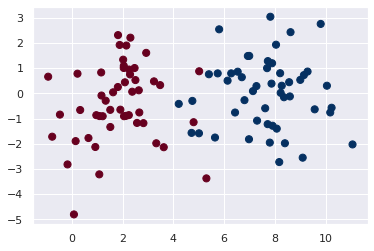

In [5]:
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap='RdBu')

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model=GaussianNB()

In [8]:
model.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
rng=np.random.RandomState(0)
x_yeni=[-6,-14]+[14,18]*rng.rand(1000,2)

In [12]:
y_yeni=model.predict(x_yeni)

(-1.5275834888765214, 11.649710764134843, -5.19618153394076, 3.431333298325665)

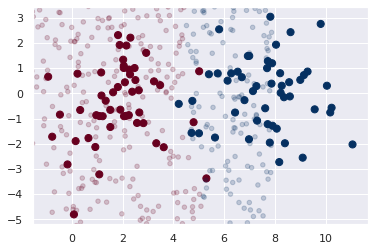

In [13]:
plt.scatter(x[:,0],x[:,1],c=y, s=50, cmap='RdBu')
lim=plt.axis()
plt.scatter(x_yeni[:,0],x_yeni[:,1],c=y_yeni,s=20,cmap='RdBu',alpha=0.2)
plt.axis(lim)

In [19]:
from sklearn.datasets import fetch_20newsgroups

In [20]:
data=fetch_20newsgroups

In [21]:
kategoriler=['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']

In [22]:
train=fetch_20newsgroups(subset='train',categories=kategoriler)
test=fetch_20newsgroups(subset='test',categories=kategoriler)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [16]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [24]:
model.fit(train.data,train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
etiketler=model.predict(test.data)

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
mat=confusion_matrix(test.target, etiketler)

Text(89.18, 0.5, 'tahmini')

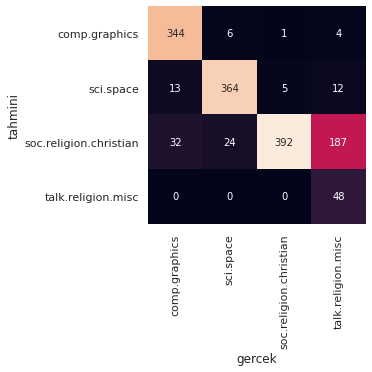

In [28]:
sns.heatmap(mat.T,square=True, annot=True,fmt='d',cbar=False,
            xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('gercek')
plt.ylabel('tahmini')